In [25]:
import numpy as np
import matplotlib.pyplot as plt
from time import time 
%matplotlib inline

** Problem 1 **: 7 pts- Using

$$
\cos(x) = \sum_{j=0}^{\infty}\frac{(-1)^{j}}{(2j)!}x^{2j},
$$

and 

$$
\cos^{2}(x) = \frac{1}{2}\left(1 + \cos(2x) \right)
$$

derive a Taylor series for $\cos^{2}(x)$ around $x=0$.  Write a code which computes the Taylor series of $\cos^{2}(x)$ using recursion, vectorization, and a tolerance based while loop approach.(4pts)  On the interval $[0,\pi]$, plot the semi-log error in your approximation for tolerance values $10^{-4}$, $10^{-6}$, and $10^{-8}$. Describe your graphs and comment on any trends you observe.(3pts)

In [3]:
def cossq(x,tol):
    tot = np.ones(x.size)
    aj = .5*np.ones(x.size)
    twxsq = (2.*x)**(2.)
    j = 1
    while np.max(np.abs(aj))>=tol:
        aj *= -twxsq/((2*j)*(2*j-1))
        tot += aj
        j +=1
    return tot

/usr/local/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.
/usr/local/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/usr/local/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log10
  """
/usr/local/Anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


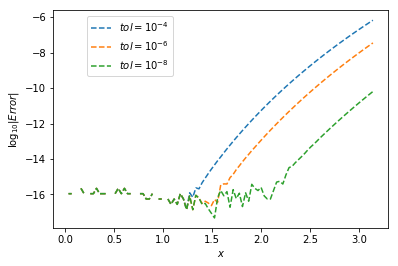

In [59]:
xvals = np.linspace(0,np.pi,1e2)
yvalst = (np.cos(xvals))**2.

yvals1 = np.log10(np.abs(yvalst - cossq(xvals,1e-4)))
yvals2 = np.log10(np.abs(yvalst - cossq(xvals,1e-6)))
yvals3 = np.log10(np.abs(yvalst - cossq(xvals,1e-8)))

plt.plot(xvals,yvals1,ls='--',label='$tol=10^{-4}$')
plt.plot(xvals,yvals2,ls='--',label='$tol=10^{-6}$')
plt.plot(xvals,yvals3,ls='--',label='$tol=10^{-8}$')
plt.legend(loc=(.1,.7))
plt.xlabel('$x$')
plt.ylabel('$\log_{10}|Error|$')


So as we see from the figure, the error in our approximation decreases as we lower the tolerance, though the error in the approximation is on the order of $10^{-16}$ for $0\leq x \leq 1.4$, and we see by $tol=10^{-8}$ that the error only goes up to $10^{-10}$ for $x\approx \pi$.  

** Problem 2 **: 7 pts- An important function in physics is the Airy function given by the Taylor Series

$$
y_{1}(x) = 1 + \sum_{m=1}^{\infty}c_{m}x^{3m}, ~ c_{m} = \prod_{l=1}^{m} \frac{1}{(3l-1)(3l)}.
$$

Note the coefficients $c_{m}$ follow the pattern

\begin{align}
c_{1} = & \prod_{l=1}^{1} \frac{1}{(3l-1)(3l)} = \frac{1}{2\cdot 3}\\
c_{2} = & \prod_{l=1}^{2} \frac{1}{(3l-1)(3l)} = \frac{1}{2\cdot 3 \cdot 5 \cdot 6}
\end{align}

Using recursion, vectorization, and a tolerance based while loop approach, write a code which makes two separate plots, one for $-L_{x}\leq x \leq 0$ and one for $0\leq x \leq L_{x}$, where $L_{x}$ is a user specified value (4pts).  Provide plots for $L_{x}=5,15$ and for tolerances $10^{-8}$ and $10^{-10}$. and describe the phenomena you see in the eight different plots. (3pts)

In [9]:
def airy_comp(x,tol):
    tot = np.ones(x.size)
    aj = np.ones(x.size)
    xthr = x**(3.)
    j = 1
    while np.max(np.abs(aj))>tol:
        aj *= xthr/((3*j-1)*(3*j))
        tot += aj
        j += 1
    return tot

In [60]:
def airy_plot(a,b,tol):
    xvals = np.linspace(a,b,int(1e3))
    yvals = airy_comp(xvals,tol)
    plt.plot(xvals,yvals)
    plt.xlabel('$x$')
    plt.ylabel('$y_{1}(x)$')

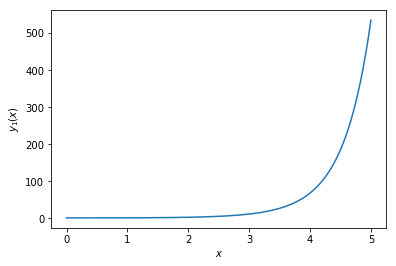

In [61]:
airy_plot(0,5,1e-8)

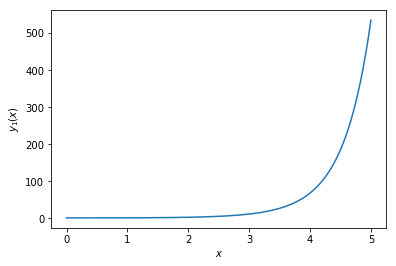

In [62]:
airy_plot(0,5,1e-10)

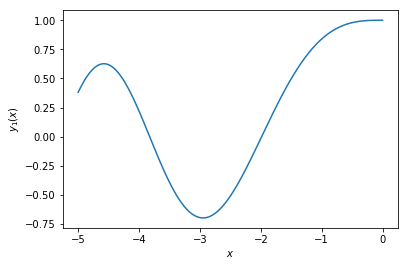

In [63]:
airy_plot(-5,0,1e-4)

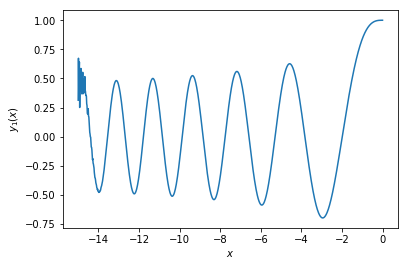

In [64]:
airy_plot(-15,0,1e-4)

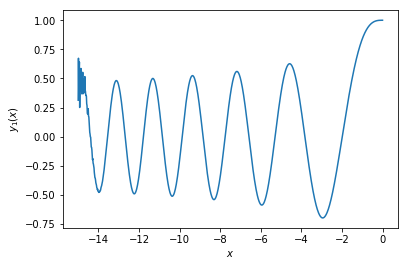

In [65]:
airy_plot(-15,0,1e-8)

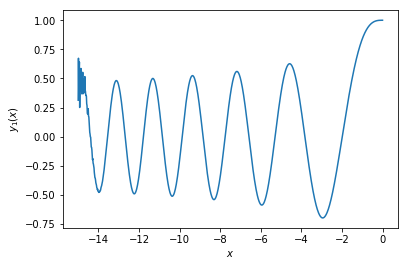

In [66]:
airy_plot(-15,0,1e-12)

_ Answers to Problem 2 _

** Problem 3 **: 5 pts- If we list all the natural numbers below 10 that are multiples of 3 or 5, we get 3, 5, 6, and 9.  The sum of these multiples is 23.  Find the sum of all multiples of 3 or 5 below 100.  Note, you will need to make use of the mod command `%`, which in effect finds remainders from division.  Note the use below.  

In [4]:
print 1%2
print 2%2
print 3%2
print 4%2
print
print 11%5
print 12%5
print 13%5
print 14%5
print 15%5

1
0
1
0

1
2
3
4
0


_ Answer to Problem 3 _  

In [35]:
def odd_sum(n):
    tot = 0
    for jj in xrange(0,n):
        if jj%3==0 or jj%5==0:
            tot += jj
    return tot

In [37]:
print odd_sum(10)
print odd_sum(100)

23
2318


** Problem 4 **: - For the terms in the Fibonacci sequence that are less than four million, what is the sum of all the even terms in the Fibonacci sequence?  

_ Answer to Problem 4 _

In [38]:
p0 = 1
p1 = 1
tot = 0
flag = True 

while flag:
    p2 = p1 + p0
    if p2<4e6:
        if p2%2==0:
            tot += p2
    else:
        flag = False
    p0 = p1
    p1 = p2
    
print tot

4613732


Using our code, we see that the answer is $4613732$.

** Problem 5 **: - Using a for loop based approach, write a program which finds 

$$
\sum_{j=1}^{n} \left(j^{4} + 3j^{2} \right)
$$

for any n.  Give the answers for $n=10$, $43$, and $72$.  

In [45]:
def weird_sum(n):
    tot = 0
    for jj in xrange(1,n+1):
        tot += jj**4 + 3*jj**2
    return tot 

In [46]:
print weird_sum(10)
print weird_sum(43)
print weird_sum(72)

26488
31219892
400925928


_ Answer to Problem 5 _

** Problem 6 **: Using a vectorized approach, which means no explicit for loops, write a program which finds 

$$
\sum_{j=1}^{n} \left(j^{4} + 3j^{2} \right)
$$

for any n.  Using `time()`, run several different tests to determine how much faster your code is than that used in the previous problem.  For what value of $n$ do you finally see a significant difference in time?    

_ Answer to Problem 6 _

In [47]:
def weird_sum_vec(n):
    jvals = np.linspace(1,n,n-1)
    tot = np.sum(jvals**4. + 3*jvals**2.)
    return tot

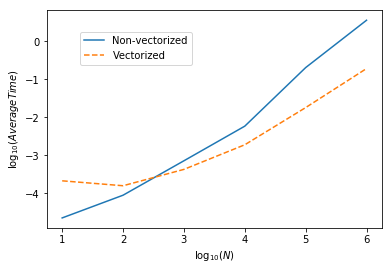

In [56]:
nvals = np.array([int(1e1), int(1e2), int(1e3), int(1e4), int(1e5), int(1e6)])
novec = np.zeros(nvals.size)
wvec = np.zeros(nvals.size)
ntimes = 5

for jj in xrange(0,nvals.size):
    difs = 0.
    for kk in xrange(0,ntimes):
        start = time()
        tot = weird_sum(nvals[jj])
        end = time()
        difs += end-start    
    novec[jj] = difs/ntimes
    
    difs = 0.
    for kk in xrange(0,ntimes):
        start = time()
        tot = weird_sum_vec(nvals[jj])
        end = time()
        difs += end-start
    wvec[jj] = difs/ntimes
    
plt.plot(np.log10(nvals),np.log10(novec),ls='-',label='Non-vectorized')
plt.plot(np.log10(nvals),np.log10(wvec),ls='--',label='Vectorized')
plt.legend(loc=(.1,.75))
plt.xlabel('$\log_{10}(N)$')
plt.ylabel('$\log_{10}(Average Time)$')

So, by running our code from $n=10$ to $n=10^{6}$, timing each function call, and then averaging the results of calling the functions five times, we see that for $N>100$, the vectorized code runs markedly faster than the non-vectorized version, and that the performance improves for larger $N$.